# Red Wine Quality Prediction Project

# Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information


-Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol


- Output variable (based on sensory data):


12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 

- Inspiration
  
Use machine learning to determine which physiochemical properties make a wine 'good'!


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


We can see  that column quality is a dependent variable and rest of the columns are independent variable . This classifies that there is a classification Problem 

In [3]:
# analysis the data without ploting 
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# we can see from bottom too
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# check the shape 
df.shape

(1599, 12)

we can see the thera are 1599 rows and 12 columns

In [6]:
# info about col
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can see there is no  null value found 

# PLoting Graphs for better insight to data distribution

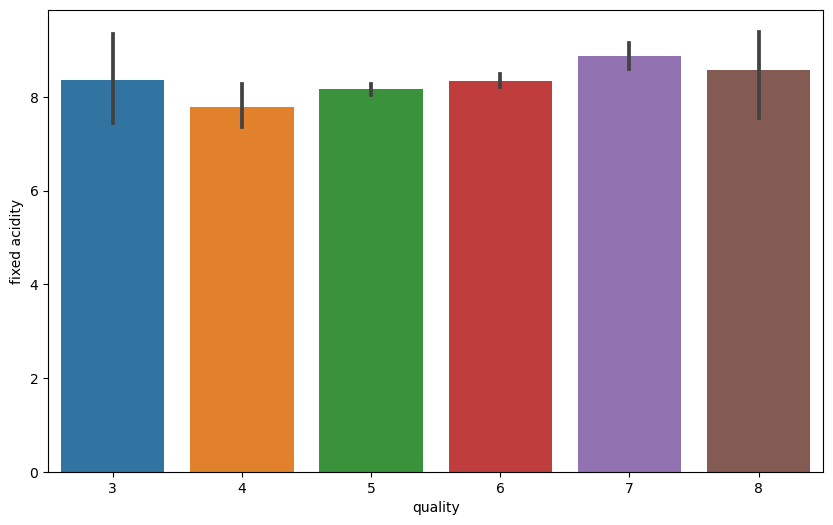

In [7]:
# fixed acidity v/s quality
plt.figure(figsize = (10,6))
sns.barplot(x='quality',y='fixed acidity',data=df)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

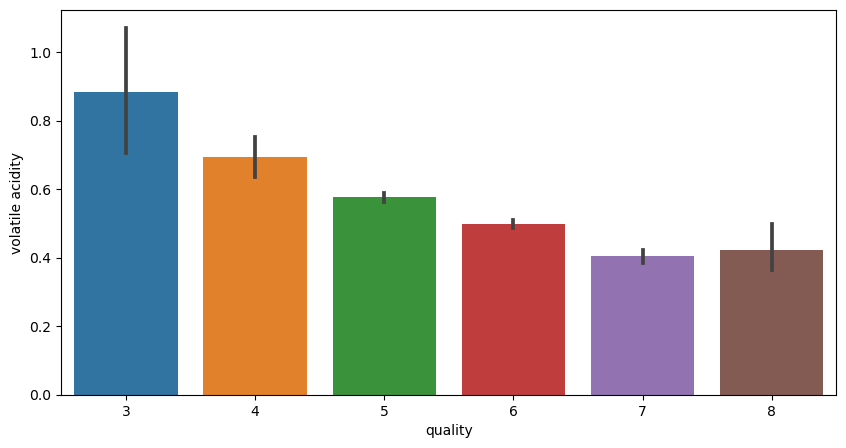

In [8]:
# valatile acidity v/s quality
plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='volatile acidity',data=df)


We can see the plot shows downward trend

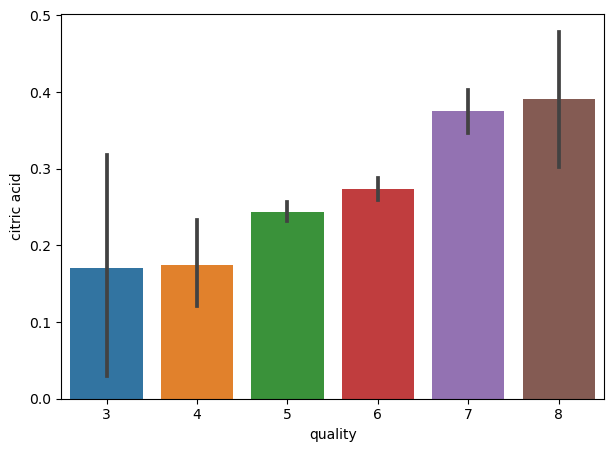

In [9]:
# citric acid v/s qualty
plt.figure(figsize=(7,5))
sns.barplot(x='quality',y='citric acid',data= df)
plt.show()

In the above plot we can see the increasing trend

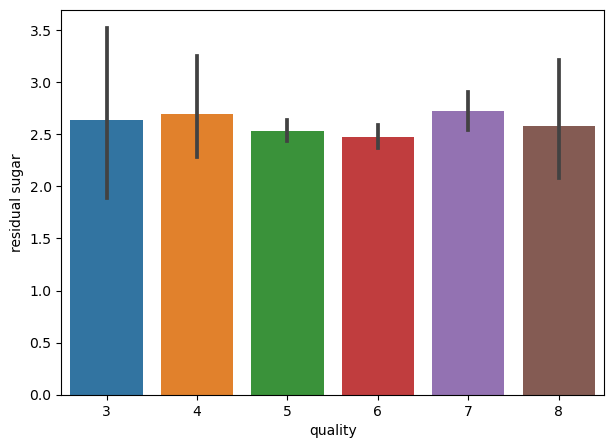

In [10]:
# now residual sugar v/s quality
plt.figure(figsize=(7,5))
sns.barplot(x='quality',y='residual sugar',data=df)
plt.show()

 there is no trend in above plot there is no trend

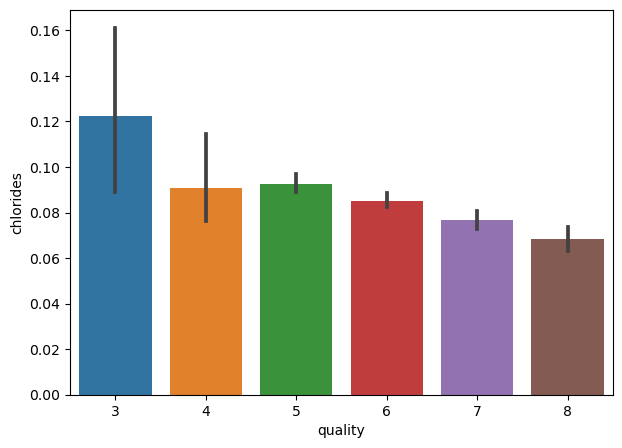

In [11]:
# chlorides v/s quality
plt.figure(figsize=(7,5))
sns.barplot(x='quality',y='chlorides',data=df)
plt.show()


We can notice that there is downing trend in above plot

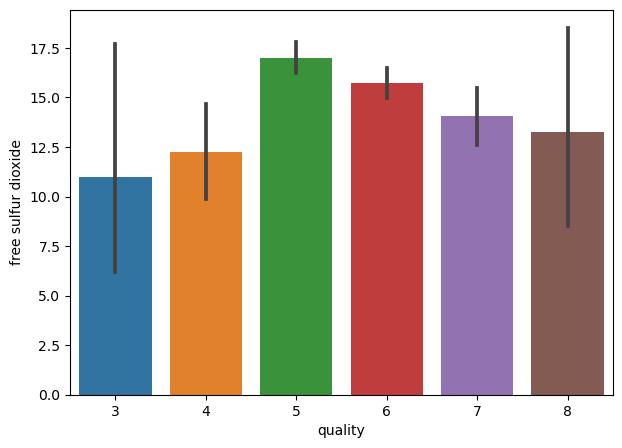

In [12]:
#free sulfur dioxide v/s quality
plt.figure(figsize=(7,5))
sns.barplot(x='quality',y='free sulfur dioxide', data=df)
plt.show()

There is no trend we notice in above plot

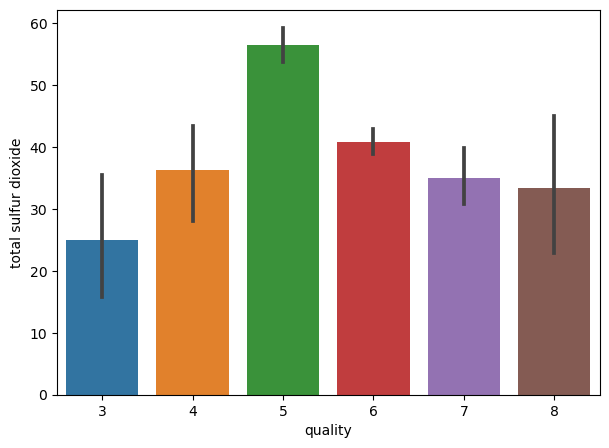

In [13]:
# total sulfur dioxide v/s quality
plt.figure(figsize=(7,5))
sns.barplot(x='quality',y='total sulfur dioxide',data=df)
plt.show()

 In the above plot also there is no trend

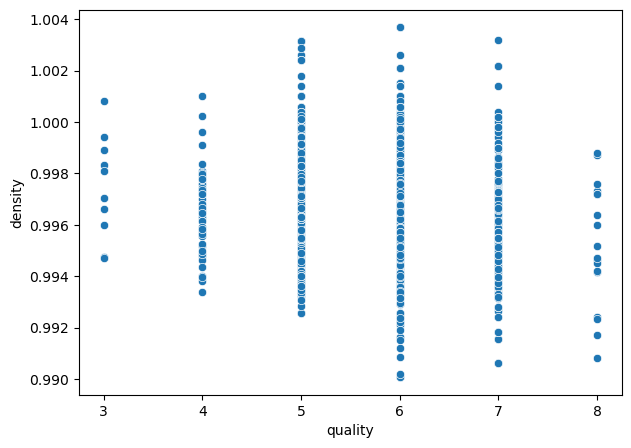

In [14]:
# density v/s quality
plt.figure(figsize=(7,5))
sns.scatterplot(x='quality',y='density',data=df)
plt.show()

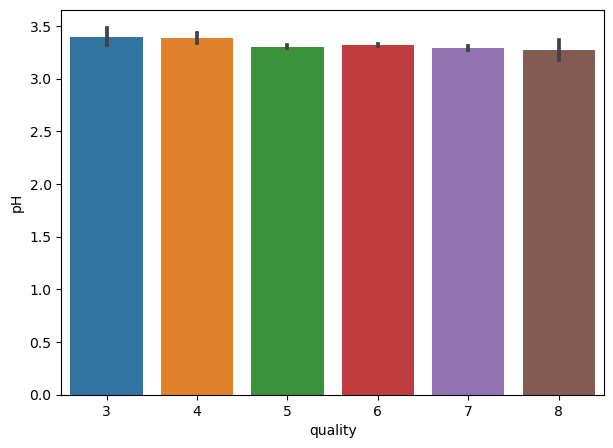

In [15]:
# pH v/s quality
plt.figure(figsize=(7,5))
sns.barplot(x='quality',y='pH',data=df)
plt.show()

there is downward trend 

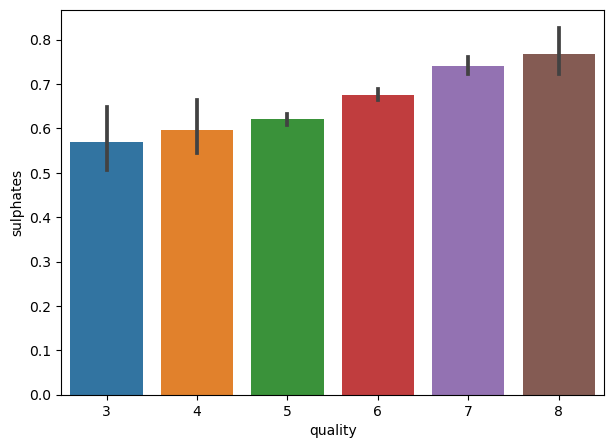

In [16]:
# sulphates v/s quality
plt.figure(figsize=(7,5))
sns.barplot(x='quality',y='sulphates',data=df)
plt.show()

There is increasing trend in the above plot

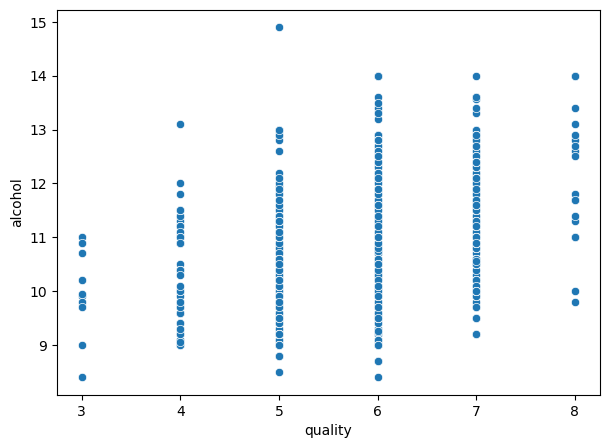

In [17]:
# alcohol v/s quality
plt.figure(figsize=(7,5))
sns.scatterplot(x='quality',y='alcohol',data=df)
plt.show()

In the above plot  data is in increasing trend

# PRE-PROCESSING DATA FOR ML ALGORITHM

In [18]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [19]:
# classifing the quality as good or bad on its quality
#'Bad'or 0 if quality of wine lies in the range (3,6)
#'Good'or 1 if quality of wine lies in the range(7,8)
df['quality'] = df['quality'].apply(lambda x:1 if x > 6.5 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


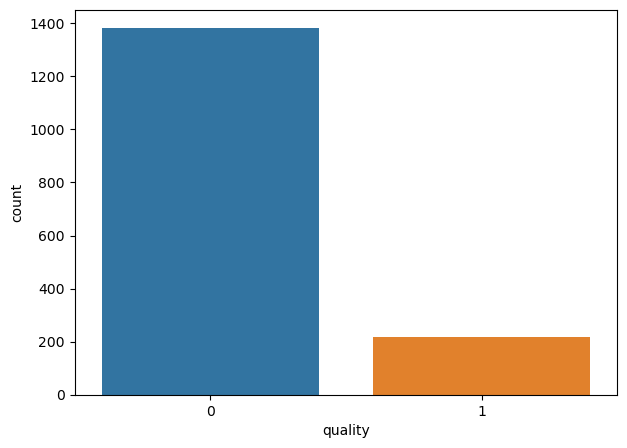

In [20]:
print(df['quality'].value_counts())
fig = plt.figure(figsize = (7,5))
sns.countplot(df['quality'])
plt.show()

we can see  in the above plot that more wine quality is bad denoted by 0 and less is good quality wine that is denoted by 1

In [21]:
# seprating to Dependent and Independent variable
x=df.iloc[: ,:-1].values
y=df.iloc[:,-1].values

In [22]:
# checking 
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [23]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
# splitting into train and test sets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 42)
 
print(" x-train shape: ", x_train.shape)
print("x-test shape: ", x_test.shape)
print("y-train shape: ",y_test.shape)
print("y-test shape: ",y_test.shape)


 x-train shape:  (1279, 11)
x-test shape:  (320, 11)
y-train shape:  (320,)
y-test shape:  (320,)


In [99]:
# applying standard scaling to the dataset to scale all the field values to same scale(approx)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


# CREATING ML ALGORITHM

# (1)RANDOM FOREST CLASSIFIER

In [100]:
from sklearn.ensemble import RandomForestClassifier
#creating random forest classifier instance
rf_regressor = RandomForestClassifier(n_estimators = 100)

# Fitting the classifier with training data
rf_regressor.fit(x_train, y_train)

#predicting using Classifier 
y_pred = rf_regressor.predict(x_test)

[[264   9]
 [ 30  17]]


<Figure size 1000x600 with 0 Axes>

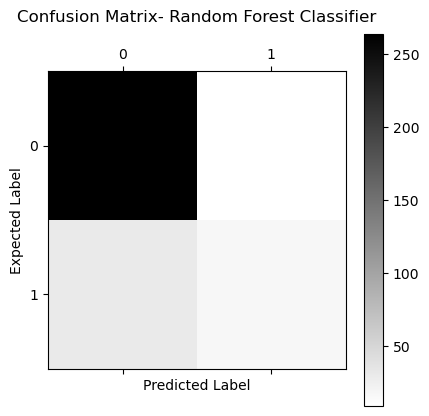

In [101]:
# Confusion_matrix using the Random Forest Classifier
cm =confusion_matrix(y_test, y_pred)
print(cm)

# matplot for confusion matrix of random forest classifier
fig = plt.figure(figsize = (10,6))
plt.matshow(cm,cmap = plt.cm.binary,interpolation ='nearest')
plt.title('Confusion Matrix- Random Forest Classifier\n')
plt.colorbar()
plt.ylabel('Expected Label')
plt.xlabel('Predicted Label')
plt.show()
          

In [102]:
print('Total Prediction: ', len(y_pred))
print('Correct Prediction: ',sum(y_pred == y_test))
print('Incorrect Prediction: ', sum(y_pred != y_test))
print('Accuracy: ', sum(y_pred == y_test)*100/len(y_pred),'%')

Total Prediction:  320
Correct Prediction:  281
Incorrect Prediction:  39
Accuracy:  87.8125 %


# SUPPORT VECTOR CLASSIFIER (SVC)

In [103]:
# Supportr vector classifier instance

svc_regressor = SVC()

#fitting train data to support vector classifier 
svc_regressor.fit(x_train,y_train)

#predicting using svc
y_pred = svc_regressor.predict(x_test)



[[268   5]
 [ 35  12]]


<Figure size 1000x600 with 0 Axes>

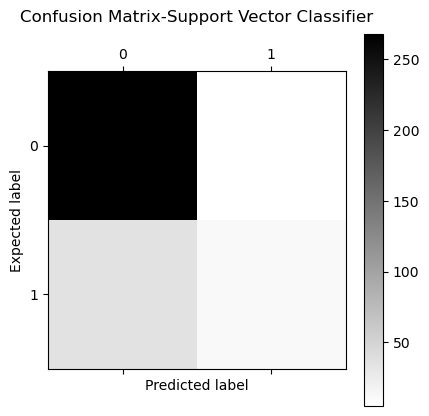

In [104]:
# confusion  matrix using svc

cm = confusion_matrix(y_test,y_pred)
print(cm)

#matplot for confusion matrix of svc
fig = plt.figure(figsize =(10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title('Confusion Matrix-Support Vector Classifier\n')
plt.colorbar()
plt.ylabel('Expected label')
plt.xlabel('Predicted label')
plt.show()

In [107]:
print('Total Prediction: ', len(y_pred))
print('Correct Prediction: ',sum(y_pred == y_test))
print('Incorrect Prediction: ', sum(y_pred != y_test))
print('Accuracy: ', sum(y_pred == y_test)*100/len(y_pred),'%')

Total Prediction:  320
Correct Prediction:  280
Incorrect Prediction:  40
Accuracy:  87.5 %


# TUNING ML ALGORITHM
(1) SVC

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# Finding parameter for SVC models
param = {'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],'kernel':['linear','rbf'],
       'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]}
grid_svc = GridSearchCV(svc_regressor,param_grid = param, scoring = 'accuracy', cv = 10)

In [131]:
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [132]:
print('Best Parameter for SVC:',grid_svc.best_params_)

Best Parameter for SVC: {'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}


Confusion matrix :
  [[271   2]
 [ 31  16]]


<Figure size 1000x600 with 0 Axes>

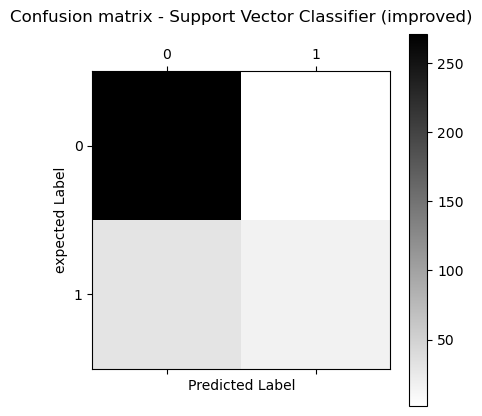

In [135]:
svc_regressor2 = SVC (C =1.2,gamma = 0.9, kernel ='rbf')

svc_regressor2.fit(x_train, y_train)

y_pred_svc = svc_regressor2.predict(x_test)

cm_svc2 = confusion_matrix(y_test, y_pred_svc)
print('Confusion matrix :\n ', cm_svc2)

fig = plt.figure(figsize = (10,6))
plt.matshow(cm_svc2, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confusion matrix - Support Vector Classifier (improved)\n")
plt.colorbar()
plt.ylabel('expected Label')
plt.xlabel('Predicted Label')
plt.show()

In [136]:
print('Total Prediction: ', len(y_pred_svc))
print('Correct Prediction: ',sum(y_pred_svc == y_test))
print('Incorrect Prediction: ', sum(y_pred_svc != y_test))
print('Accuracy: ', sum(y_pred_svc == y_test)*100/len(y_pred),'%')

Total Prediction:  320
Correct Prediction:  287
Incorrect Prediction:  33
Accuracy:  89.6875 %


# (2)RANDOM FOREST CLASSIFIER

In [139]:
rf_eval = cross_val_score(estimator = rf_regressor, X = x_train, y = y_train, cv = 10)
rf_eval.mean()

0.9140132874015748

# RESULT

1- We created  ML classifiers for classifying wine as good or bad.

2- The dataset contains 1599 records and 12 fields.

3- Random forest classifiers classified with an accurcy of 88% (approx.), and 91%  after tuning.

4- SVC classifiet with and accuracy of 87% (approx.)and 89% (approx.).after tuning